## Day 08

**Dashboard Objective**

This dashboard aims to visualize long-term climate trends in Mumbai,
highlight seasonal rainfall patterns, temperature variability,
and potential extreme weather indicators.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv
climate_df = pd.read_csv("mumbai_climate_day07.csv")

# Numerical column
num=climate_df.select_dtypes(exclude=object)

In [3]:
climate_df.columns

Index(['Year', 'Season', 'Temp_Range', 'Rain', 'Temp Max'], dtype='object')

In [4]:
climate_df.describe()

,Year,Temp_Range,Rain,Temp Max
count,26803.000000,26746.000000,26806.000000,26748.000000
mean,1987.192590,11.318291,0.387193,32.078838
std,21.184969,4.086887,8.239353,2.718299
min,1951.000000,1.800000,0.000000,22.719999
25%,1969.000000,7.490000,0.000000,29.969999
50%,1987.000000,12.080000,0.000000,31.860001
75%,2006.000000,14.830000,0.000000,34.200001
max,2024.000000,20.730000,1011.700000,40.900000


**Key Observations**

- Rainfall shows higher variability compared to temperature metrics.
- Temperature range helps capture daily climate volatility.
- Seasonal grouping will provide clearer climate patterns than monthly granularity.

In [5]:
seasonal_summary = climate_df.groupby('Season').agg({
    'Rain': 'mean',
    'Temp Max': 'mean',
    'Temp_Range': 'mean'
}).reset_index()

seasonal_summary

,Season,Rain,Temp Max,Temp_Range
0,Monsoon,0.996112,30.314615,6.561432
1,Post-Monsoon,0.066629,32.731042,12.504518
2,Summer,0.011751,35.153139,13.038052
3,Winter,0.168037,30.846962,15.199915


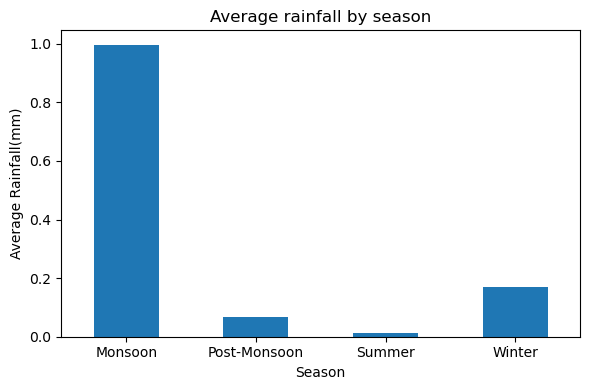

In [12]:
seasonal_rain = climate_df.groupby('Season')['Rain'].mean()

plt.figure(figsize=(6,4))
seasonal_rain.plot(kind='bar')
plt.title("Average rainfall by season")
plt.xlabel("Season")
plt.ylabel("Average Rainfall(mm)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Rainfall in Mumbai is highly seasonal, with the monsoon contributing the overwhelming   majority of annual precipitation. This confirms strong dependence on monsoonal systems and  highlights seasonal imbalance in water distribution.

- Highly right-skewed rainfall
- Zero-heavy data outside monsoon
- Classic climate seasonality pattern

In [6]:
yearly_summary = climate_df.groupby('Year').agg({
    'Rain': 'mean',
    'Temp Max': 'mean',
    'Temp_Range': 'mean'
}).reset_index()

yearly_summary

,Year,Rain,Temp Max,Temp_Range
0,1951.0,0.000000,32.015342,11.416795
1,1952.0,0.000000,31.914372,11.357678
2,1953.0,0.000000,31.947836,11.217863
3,1954.0,0.000000,31.400740,11.133014
4,1955.0,0.000000,31.626274,11.156986
...,...,...,...,...
69,2020.0,0.000000,32.204220,10.627225
70,2021.0,9.028219,32.667033,9.134341
71,2022.0,7.815342,32.445604,9.213187
72,2023.0,11.067123,32.961078,9.006587


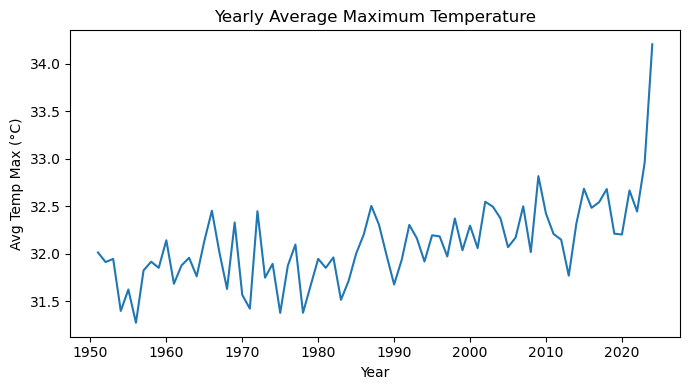

In [10]:
yearly_temp = climate_df.groupby('Year')['Temp Max'].mean()

plt.figure(figsize=(7,4))
plt.plot(yearly_temp.index, yearly_temp.values)
plt.title("Yearly Average Maximum Temperature")
plt.xlabel("Year")
plt.ylabel("Avg Temp Max (°C)")
plt.tight_layout()
plt.show()

- The long-term trend indicates a gradual rise in average maximum temperatures over the decades, with recent years showing accelerated warming — consistent with urban heat and climate change effects.

- Low volatility, strong trend
- Time-series ready
- High storytelling value for dashboards

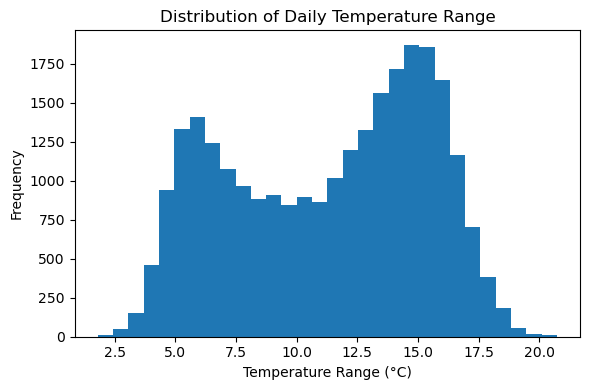

In [11]:
plt.figure(figsize=(6,4))
plt.hist(climate_df['Temp_Range'], bins=30)
plt.title("Distribution of Daily Temperature Range")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- Daily temperature variability is generally moderate, though occasional extreme fluctuations exist, suggesting sporadic weather instability rather than consistent volatility.

- Mild skewness
- limited outliers
- good candidate for threshold-based analysis

**Trend Analysis Rationale**

Year-wise aggregation is used to study long-term climate shifts
and smooth short-term fluctuations.

In [14]:
climate_df.to_csv("climate_dashboard_base.csv", index=False)
seasonal_summary.to_csv("climate_seasonal_summary.csv", index=False)
yearly_summary.to_csv("climate_yearly_trend.csv", index=False)

**Day 08: Seasonal patterns and long-term climate trends visualization**